**NAME- JIGYASA GAUTAM**

**TASK 1**

Predict the percentage of a student based on the no. of study hours.

**PROBLEM**

To predict what will be predicted score if a student studies for 9.25 hrs/ day?

IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

IMPORTING DATASET

In [ ]:
data=pd.read_csv("/content/student_scores - student_scores.csv")

CHECKING AND VISUALISING THE DATA

In [ ]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


CHECKING FOR NULL VALUES

In [ ]:
data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


MAKING A LIST OF COLUMNS

In [ ]:
columns = list(data.columns)

In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
X = data["Hours"].values.reshape(-1,1)
Y = data["Scores"].values.reshape(-1,1)

VISUALISING THE DATA

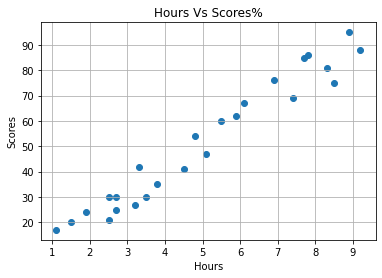

In [ ]:
plt.scatter( X , Y , color = "#1f77b4" )
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours Vs Scores%")
plt.grid()
plt.show()

SPLITTING THE DATA

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)


LOADIND THE MODULES FOR LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression

Creating the linear regression object

In [ ]:
lr = LinearRegression()
lr

LinearRegression()

TRAINING THE MODEL

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
line = lr.coef_ * X + lr.intercept_

VISUALISING TRAINED DATA

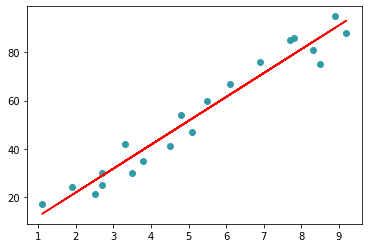

In [ ]:
plt.scatter(x_train , y_train , color = "#329ba8")
plt.plot(X , line , color = "r")
plt.show()

MAKING PREDICTIONS

In [ ]:
Y_pred = lr.predict(x_test)
Y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

VISUALISING TEST DATA

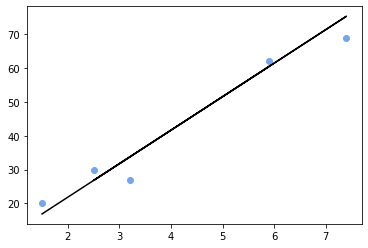

In [ ]:
plt.scatter(x_test,y_test , color = "#75a6eb")
plt.plot(x_test,Y_pred , color = "black")
plt.show()

MAKING A DATAFRAME

In [ ]:
data_predict = pd.DataFrame({"Hours": x_test.reshape(1,-1)[0] , "Actual Score" : y_test.reshape(1,-1)[0] , "Predicted Score" : Y_pred.reshape(1,-1)[0]})
data_predict

,Hours,Actual Score,Predicted Score
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


**Checking the acuracy of the model**

In [ ]:
data_sorted = data_predict.sort_values(by = "Hours")
data_sorted

,Hours,Actual Score,Predicted Score
0,1.5,20,16.884145
3,2.5,30,26.794801
1,3.2,27,33.732261
4,5.9,62,60.491033
2,7.4,69,75.357018


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


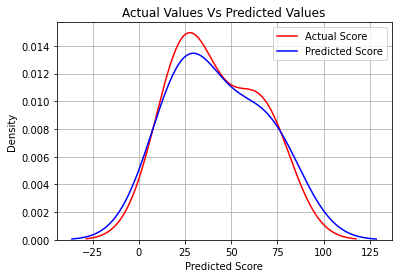

In [ ]:
title = "Actual Values Vs Predicted Values"
ax1 = sns.distplot(data_sorted["Actual Score"], hist = False , color = "red" , label = "Actual Score")
sns.distplot(data_sorted["Predicted Score"] , hist = False , color = "blue" , label = "Predicted Score" , ax = ax1)
plt.legend()
plt.grid()
plt.title(title)
plt.show()

In [ ]:
from sklearn.metrics import r2_score
from sklearn import metrics

mean_absolute_error=metrics.mean_absolute_error(y_test,Y_pred)
print('Mean absolute error:',mean_absolute_error)

corr=r2_score(y_train,lr.predict(x_train))
print('correlation:',corr)

acc=r2_score(y_test,Y_pred)
print('Accuracy:',acc)

Mean absolute error: 4.183859899002982
correlation: 0.9515510725211552
Accuracy: 0.9454906892105354


**CONCLUDING BY MAKING PREDICTIONS**

In [ ]:
hrs = 9.25
pred = lr.predict([[9.25]])
print("The predicted score if a student studies for 9.25 hrs/ day is",pred[0])

The predicted score if a student studies for 9.25 hrs/ day is [93.69173249]
